In [5]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df=pd.DataFrame(insurance_dataset)
print(df['sex'].unique())

['female' 'male']


In [10]:
insurance_dataset.shape

(1338, 7)

In [11]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features:
Sex, Smoker, Region

    

In [12]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data analysis

In [21]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Encoding the categorical features

In [13]:
#encoding the sex, smoker,region  column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2, 'northwest':3}}, inplace=True)


In [14]:
#splitting train test split
X= insurance_dataset.drop(columns='charges', axis=1)
Y=insurance_dataset['charges']

In [11]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [15]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [16]:
X_train.head(5)

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0


In [17]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', Y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', Y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070,)
Size of X_test :  (268, 6)
Size of Y_test :  (268,)


In [26]:
import numpy as np

class MyLR:
    def __init__(self):
        self.coef_ = None 
        self.intercept_ = None

    def fit(self, X_train, Y_train):
        # Convert to NumPy arrays if input is a DataFrame or Series
        if not isinstance(X_train, np.ndarray):
            X_train = X_train.to_numpy()
        if not isinstance(Y_train, np.ndarray):
            Y_train = Y_train.to_numpy()
        
        # Add bias term to X_train
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Compute coefficients using the normal equation
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(Y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        # Convert to NumPy array if input is a DataFrame
        if not isinstance(X_test, np.ndarray):
            X_test = X_test.to_numpy()
        
        # Add bias term to X_test
       #X_test = np.insert(X_test, 0, 1, axis=1)

        # Compute predictions
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred


In [27]:
lr = MyLR()


In [28]:
lr.fit(X_train, Y_train)

In [29]:
lr.predict(X_test)

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.1333321 ,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [28]:
#model evaluation
#Prediction on training data
training_data_prediction = lr.predict(X_train)

In [29]:
#R sq value
r2_train=metrics.r2_score(Y_train, training_data_prediction)
print('R sq Value: ', r2_train)

R sq Value:  0.751505643411174


In [30]:
test_data_prediction=lr.predict(X_test)

In [31]:
r2_test=metrics.r2_score(Y_test, test_data_prediction)
print('R sq Value: ', r2_test)

R sq Value:  0.7447273869684078


In [30]:
#function to take input and predict
#main
import numpy as np
data_field = ["age","sex","bmi","childeren","smoker","region"]
input_data11 = []
print("Please enter six numerical values:")
for i in data_field:
    while True:
        try:
            value = float(input(f"Enter value {i} : "))
            input_data11.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")
    
numpy_array = np.asarray(input_data11)
print("Numpyarrayyy :",numpy_array)
    


    
reshaped_np_array = numpy_array.reshape(1,-1) 

    
import numpy as np
# Example usage
#if __name__ == "__main__":
numpy_array11 = reshaped_np_array

print("Your Reshaped NumPy array:", numpy_array11)
prediction=lr.predict(numpy_array11)
print("Cost: $",prediction)



feature_names = df.columns
coefficients = lr.coef_
absolute_coefficients = np.abs(coefficients)  # Take absolute values of coefficients
percentage_impact = (absolute_coefficients / np.sum(absolute_coefficients)) * 100  # Normalize to percentages


print(coefficients)
print(absolute_coefficients)
print(np.abs(percentage_impact))
only_positive_coefficient = coefficients[coefficients >= 0]


data_field_keys = ["age","sex","bmi","childeren","smoker","region"]

percentage_impact_dict = dict(zip(data_field_keys,only_positive_coefficient))
print("dict: ", percentage_impact_dict)

#percentage_impact_all = (coefficients / np.sum(coefficients)) *100 
positive_percentage_impact = (only_positive_coefficient / np.sum(only_positive_coefficient)) *100 
print("positive_percentage_impact: ",positive_percentage_impact,"%")

# Display the results
impact_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Impact (%)": percentage_impact
}).sort_values(by="Impact (%)", ascending=False)
print("\n Features Impact on Insurance cost:")
print(impact_df)


#df = pd.DataFrame(positive_percentage_impact:, columns=["Column1", "Column2", "Column3"])

Please enter six numerical values:


Enter value age :  25
Enter value sex :  1
Enter value bmi :  29
Enter value childeren :  2
Enter value smoker :  1
Enter value region :  2


Numpyarrayyy : [25.  1. 29.  2.  1.  2.]
Your Reshaped NumPy array: [[25.  1. 29.  2.  1.  2.]]
Cost: $ [4914.55063654]
[   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]
[  251.40512196    26.11715966   330.64637157   580.27438296
 23928.10171061   212.22242728]
[ 0.99256754  0.10311264  1.30541834  2.29096971 94.47006065  0.83787113]
dict:  {'age': 251.4051219591726, 'sex': 26.117159659133847, 'bmi': 330.6463715684966, 'childeren': 580.2743829604731, 'smoker': 212.22242728334118}
positive_percentage_impact:  [17.94897701  1.86462509 23.60637713 41.42847797 15.15154281] %


ValueError: All arrays must be of the same length

In [3]:
input_data11.type()

AttributeError: 'list' object has no attribute 'type'

In [2]:
#function to take input and predict
#main
import numpy as np
data_field = ["age","sex","bmi","childeren","smoker","region"]
input_data11 = []
print("Please enter six numerical values:")
for i in data_field:
    while True:
        try:
            value = float(input(f"Enter value {i} : "))
            input_data11.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")
    
numpy_array = np.asarray(input_data11)
print("Numpyarrayyy :",numpy_array)
    


    
reshaped_np_array = numpy_array.reshape(1,-1) 

    
import numpy as np
# Example usage
#if __name__ == "__main__":
numpy_array11 = reshaped_np_array

print("Your Reshaped NumPy array:", numpy_array11)
prediction=lr.predict(numpy_array11)
print("Cost: $",prediction)



feature_names = df.columns
coefficients = lr.coef_
absolute_coefficients = np.abs(coefficients)  # Take absolute values of coefficients
percentage_impact = (absolute_coefficients / np.sum(absolute_coefficients)) * 100  # Normalize to percentages


print(coefficients)
print(absolute_coefficients)
print(np.abs(percentage_impact))
only_positive_coefficient = coefficients[coefficients >= 0]


data_field_keys = ["age","sex","bmi","childeren","smoker","region"]

percentage_impact_dict = dict(zip(data_field_keys,only_positive_coefficient))
print("dict: ", percentage_impact_dict)

#percentage_impact_all = (coefficients / np.sum(coefficients)) *100 
positive_percentage_impact = (only_positive_coefficient / np.sum(only_positive_coefficient)) *100 
print("positive_percentage_impact: ",positive_percentage_impact,"%")

# Display the results
impact_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Impact (%)": percentage_impact
}).sort_values(by="Impact (%)", ascending=False)
print("\n Features Impact on Insurance cost:")
print(impact_df)


#df = pd.DataFrame(positive_percentage_impact:, columns=["Column1", "Column2", "Column3"])

Please enter six numerical values:


Enter value age :  45
Enter value sex :  1
Enter value bmi :  25
Enter value childeren :  1
Enter value smoker :  1
Enter value region :  1


Numpyarrayyy : [45.  1. 25.  1.  1.  1.]
Your Reshaped NumPy array: [[45.  1. 25.  1.  1.  1.]]


NameError: name 'lr' is not defined

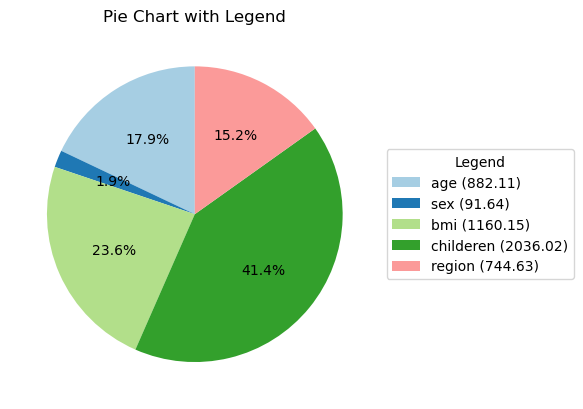

In [33]:
#new pie chart
import matplotlib.pyplot as plt

# Data for the pie chart


# Add values to the labels

#plt.pie(d_values_pie_array, labels=labels, explode = myexplode)

import matplotlib.pyplot as plt



# Define custom colors
colors = plt.cm.Paired.colors[:len(labels)]

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    d_values_pie_array,
    labels=None,             # Exclude labels directly from the pie
    autopct='%1.1f%%',       # Show percentage on pie chart
    startangle=90,           # Rotate for better alignment
    colors=colors            # Apply custom colors
)

# Add legend with labels and values
plt.legend(
    handles=wedges,                      # Use pie wedges for legend markers
    labels=[f"{label} ({value})" for label, value in zip(labels, d_values_pie_array)], # Combine label and value
    loc="center left",                   # Position legend on the right
    bbox_to_anchor=(1, 0, 0.5, 1),       # Adjust legend position
    title="Legend"                       # Add a title to the legend
)

# Add a title
plt.title("Pie Chart with Legend")

# Show the plot
plt.show()


sum of positive coef percentage:  dict_values([17.948977005787796, 1.8646250900743775, 23.606377125816476, 41.428477970694054, 15.15154280762729])
cost factor {'age': array([882.11156369]), 'sex': array([91.63794423]), 'bmi': array([1160.1473573]), 'childeren': array([2036.02352782]), 'region': array([744.6302435])}
grand total [4914.55063654]
['age', 'sex', 'bmi', 'childeren', 'region']
[ 882.11156369   91.63794423 1160.1473573  2036.02352782  744.6302435 ]
labels type <class 'list'>
d_values_pie type <class 'numpy.ndarray'>


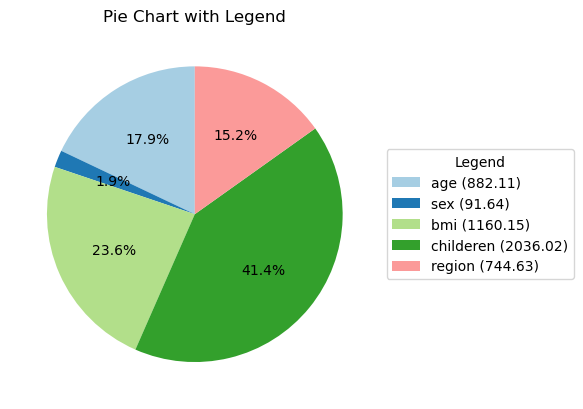

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data

#rough
data_field_keys = ["age","sex","bmi","childeren","smoker","region"]
percentage_impact_all = (coefficients / np.sum(coefficients)) *100 
coef_dict = dict(zip(data_field_keys, coefficients))

if input_data11[4] == 0:
    coef_dict['smoker'] = abs(coef_dict['smoker'])

positive_coef_dict = {key: value for key, value in coef_dict.items() if value >= 0}
total_positive_coef = sum(positive_coef_dict.values())
positive_coef_percentage_dict =  {key: (value / total_positive_coef) * 100 for key, value in positive_coef_dict.items()}
print( "sum of positive coef percentage: ", np.sum(positive_coef_percentage_dict.values()))
Cost_factor =  {key: (value)/100 * prediction for key, value in positive_coef_percentage_dict.items()}
print("cost factor",Cost_factor)
print("grand total",prediction)

#visulation pie chart

labels=list(Cost_factor.keys())

values_pie= list(Cost_factor.values())
d_values_pie = np.concatenate(values_pie)

print(labels)
print(d_values_pie)
print("labels type",type(labels))
print("d_values_pie type",type(d_values_pie))
d_values_pie_array = d_values_pie.tolist()
d_values_pie_array = [round(num, 2) for num in d_values_pie_array]
# Create the pie chart
#plt.figure(figsize=(8, 8))  # Optional: Adjust figure size
if len(Cost_factor) ==5:
    myexplode = [0, 0, 0, 0, 0 ]
   
    # Define custom colors
    colors = plt.cm.Paired.colors[:len(labels)]

    # Create the pie chart
    wedges, texts, autotexts = plt.pie(
        d_values_pie_array,
        labels=None,             # Exclude labels directly from the pie
        autopct='%1.1f%%',       # Show percentage on pie chart
        startangle=90,           # Rotate for better alignment
        colors=colors            # Apply custom colors
    )

    # Add legend with labels and values
    plt.legend(
        handles=wedges,                      # Use pie wedges for legend markers
        labels=[f"{label} ({value})" for label, value in zip(labels, d_values_pie_array)], # Combine label and value
        loc="center left",                   # Position legend on the right
        bbox_to_anchor=(1, 0, 0.5, 1),       # Adjust legend position
        title="Legend"                       # Add a title to the legend
    )

    # Add a title
    plt.title("Pie Chart with Legend")

    # Show the plot
    plt.show()

else:
    myexplode = [0 , 0 , 0 , 0 , 0 , 0]
    #--------------------------------------------------------------------------------------------------------------------------------
    # Define custom colors
    colors = plt.cm.Paired.colors[:len(labels)]

    # Create the pie chart
    wedges, texts = plt.pie(
        d_values_pie_array,
        labels=None,            # Exclude labels from the pie
        startangle=90,          # Rotate chart for better alignment
        colors=colors           # Apply custom colors
    )

    # Add percentages outside the slices with arrows
    for wedge, value in zip(wedges, d_values_pie_array):
        # Calculate the angle of the slice
        angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
        x = np.cos(np.radians(angle))  # X-coordinate
        y = np.sin(np.radians(angle))  # Y-coordinate

        # Percentage to display
        percentage = f"{value / sum(d_values_pie_array) * 100:.1f}%"

        # Place percentage with an arrow
        plt.annotate(
            percentage,
            xy=(x, y),                           # Position near slice

            #if len(Cost_factor) ==5:
            xytext=(5.2 * x, 1.2 * y),           # Slightly outside the pie
            arrowprops=dict(arrowstyle="-", lw=1),  # Draw arrow
            ha='center',
            fontsize=8
        )

    # Add legend with labels and values
    plt.legend(
        handles=wedges,                      # Use pie wedges for legend markers
        labels=[f"{label} (Rs. {value})" for label, value in zip(labels, d_values_pie_array)],  # Add Rs prefix to values

        #labels=[f"{label} ({value})" for label, value in zip(labels, d_values_pie_array)],  # Combine label and value
        loc="center left",                   # Position legend on the right
        bbox_to_anchor=(1, 0, 0.5, 1),       # Adjust legend position
        title="Legend"                       # Add a title to the legend
    )

    # Add a title
    plt.title("Pie Chart with Percentages Outside")

    # Show the plot
    plt.show()



In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, m)
print(f"MSE: {mse}")


NameError: name 'm' is not defined